In [621]:
# загружаю библиотеки

import os
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sns

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Гипотезы:  
1) Показатель Global Innovation Index коррелирует с Gross Natural Income (GNI). Будем считать наличие кореляции, если pvalue теста Стьюднента буде менее 0.0005.  
2) Gross Natural Income коррелирует с показателями государственной поддержкой экономики. Будем считать наличие кореляции, если pvalue теста Стьюднента будет < __0.0005__.

### Диверсированные показателями государственной поддержкой экономики:

Я выбрал 37 показателей, которые могут характеризовать государственную поддержку и 5 интегральных позателей:

___1.1.	Political environment (интегральный покозатель)___  
1.1.1.	Political stability and absence of violence/terrorism  
1.1.2.	Government effectiveness  
1.1.3.	Press freedom  

___1.2.	Regulatory environment (интегральный покозатель)___  
1.2.1.	Regulatory quality  
1.2.2.	Rule of law  
1.2.3.	Cost of redundancy dismissal  

___1.3.	Business environment (интегральный покозатель)___  
1.3.1.	Ease of starting a business  
1.3.2.	Ease of resolving insolvency  
1.3.3.	Ease of paying taxes  

2.1.1.	Expenditure on education  
2.1.2.	Public expenditure on education per pupil  

2.1.5.	Pupil-teacher ratio, secondary  

2.2.1.	Tertiary enrolment  
2.2.2.	Graduates in science and engineering  

2.3.1.	Researchers  
2.3.2.	Gross expenditure on R&D (GERD)  

3.1.3.	Government's online service  

3.2.1.	Electricity output  
3.2.3.	Logistics performance  

3.3.2.	Environmental performance  


___4.1.	Credit (интегральный покозатель)___  
4.1.1.	Ease of getting credit  
4.1.2.	Domestic credit to private sector  
4.1.3.	Microfinance institutions' gross loan portfolio  

4.2.1.	Ease of protecting investors  

4.2.4.	Venture capital deals  

4.3.2.	Market access for non-agricultural exports  
4.3.3.	Intensity of local competition  

5.1.2.	Firms offering formal training  

___5.2.	Innovation linkages (интегральный покозатель)___   
5.2.1.	University/industry research collaboration  
5.2.2.	State of cluster development  
5.2.3.	GERD financed by abroad  
5.2.4.	Joint venture/strategic alliance deals  
5.2.5.	Patent families filed in at least three offices  

5.3.1.	Royalties and license fees payments (% of service imports)  
5.3.4.	Foreign direct investment net inflows  

6.1.2.	Patent Cooperation Treaty resident applications  

6.3.4.	Foreign direct investment net outflows

### Интегральные показатели
1.1 Political environment  
1.2 Regulatory environment  
1.3 Business environment  
4.1 Credit  
5.2 Innovation linkages

# Исследование датасета

Построить графики:  
1) индекс gii по годам и регионам - кластеризация  
2) индекс gii по годам  
3) интегральные признаки по регионам  

In [2]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()

In [3]:
 for ds in list(dataset.keys()):
        print(ds)#, ':', len(dataset[ds].columns))

2013
2014
2015
2016
2017
2018
2019
integr_fe
region
GII
GNI


In [4]:
len(dataset['GNI'].columns)

183

In [5]:
dataset['GII'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to region
Columns: 227 entries, Albania to Zimbabwe
dtypes: object(227)
memory usage: 14.2+ KB


In [6]:
dataset['GII'].T.describe()

,2013,2014,2015,2016,2017,2018,2019,region
count,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227
unique,143.0,143.0,143.0,142.0,141.0,142.0,147.0,22
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Caribbean
freq,85.0,81.0,81.0,81.0,81.0,81.0,81.0,24


## Индекс GII по годам и регионам

In [7]:
range_country = dataset['region']['region'].value_counts()
print(' Всего стран:',len(dataset['region'].index),  'В', len(range_country.index), 'регионах')

 Всего стран: 227 В 22 регионах


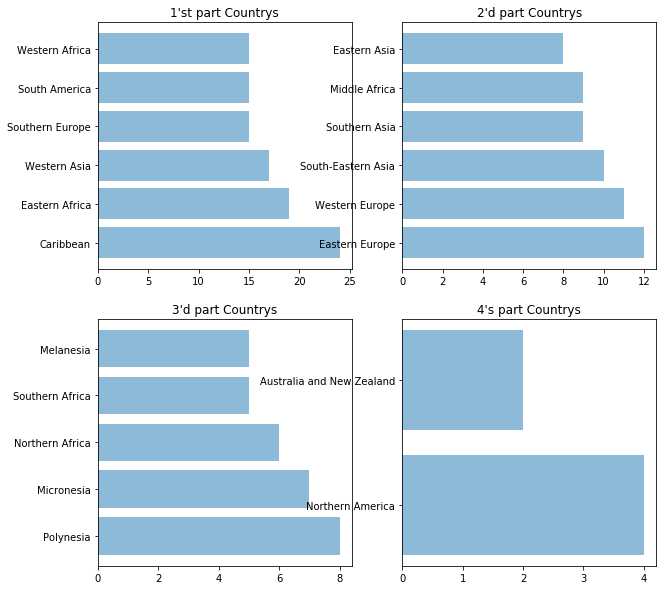

In [8]:
gridsize = (2, 2)
fig1, ax1 = plt.subplots(2,2, figsize = [10,10])
ax1 = ax1.flatten()

ax1[0] = plt.subplot2grid(gridsize, (0, 0))
ax1[0].barh(range_country.index[0:6], dataset['region']['region'].value_counts()[0:6], align='center', alpha=0.5)
ax1[0].set_title("1'st part Countrys")

ax1[1] = plt.subplot2grid(gridsize, (0, 1))
ax1[1].barh(range_country.index[7:13], dataset['region']['region'].value_counts()[7:13], align='center', alpha=0.5)
ax1[1].set_title("2'd part Countrys")

ax1[2] = plt.subplot2grid(gridsize, (1, 0))
ax1[2].barh(range_country.index[14:19], dataset['region']['region'].value_counts()[14:19], align='center', alpha=0.5)
ax1[2].set_title("3'd part Countrys")

ax1[3] = plt.subplot2grid(gridsize, (1, 1))
ax1[3].barh(range_country.index[20:22], dataset['region']['region'].value_counts()[20:22], align='center', alpha=0.5)
ax1[3].set_title("4's part Countrys")

plt.show()

In [9]:
reg_count = {}
reg_count = dataset['GII'].iloc[[7]].T['region'].value_counts()[:22]
reg_count

Caribbean                    24
Eastern Africa               19
Western Asia                 17
Southern Europe              15
South America                15
Western Africa               15
Northern Europe              13
Eastern Europe               12
Western Europe               11
South-Eastern Asia           10
Southern Asia                 9
Middle Africa                 9
Eastern Asia                  8
Central America               8
Polynesia                     8
Micronesia                    7
Northern Africa               6
Southern Africa               5
Melanesia                     5
Central Asia                  5
Northern America              4
Australia and New Zealand     2
Name: region, dtype: int64

In [10]:
#создаю датафраме с суммой gii по регионама и годам
ds_gii_sum = dataset['GII'].iloc[[0,7], :].T.groupby('region').sum().reset_index()
for i  in range(1,7):
    ds_gii_sum = ds_gii_sum.merge(dataset['GII'].iloc[[i,7], :].T.groupby('region').sum().reset_index(), how = 'left')
ds_gii_sum.fillna(0, inplace = True)
ds_gii_sum = ds_gii_sum.iloc[:22]
ds_gii_sum = ds_gii_sum.rename(index = ds_gii_sum['region'])
ds_gii_sum.drop('region', axis = 1, inplace = True)
ds_gii_sum.drop(2019, axis = 1, inplace = True)

#усреднение gii на 1 страну в реионе
for reg in ds_gii_sum.index:
    ds_gii_sum.loc[reg] /= reg_count[reg]
ds_gii_sum

,2013,2014,2015,2016,2017,2018
Australia and New Zealand,18.000000,17.500000,16.000000,18.000000,22.000000,21.000000
Caribbean,12.041667,12.333333,12.583333,12.097222,12.319444,12.736111
Central America,85.875000,89.500000,89.375000,86.750000,87.812500,89.312500
Central Asia,87.000000,91.200000,85.400000,78.333333,78.933333,79.333333
Eastern Africa,65.000000,71.105263,71.894737,65.333333,67.877193,67.256140
Eastern Asia,19.250000,16.500000,17.375000,15.125000,14.375000,13.625000
Eastern Europe,45.166667,43.500000,42.166667,42.583333,42.666667,41.583333
Melanesia,19.400000,19.000000,23.000000,20.466667,20.466667,20.466667
Micronesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Middle Africa,41.222222,40.000000,37.888889,39.888889,39.777778,39.111111


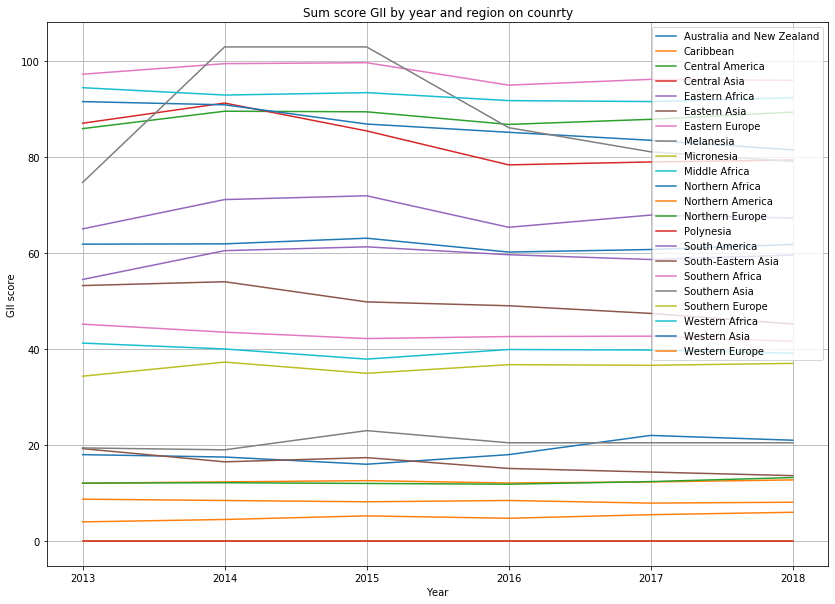

In [11]:
plt.figure(figsize = [14,10])
plt.title('Sum score GII by year and region on counrty')
plt.xlabel('Year')
plt.ylabel('GII score')
plt.grid(axis = 'both')
plt.plot(ds_gii_sum.T)
plt.legend(ds_gii_sum.index)
plt.show()

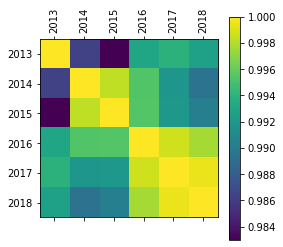

In [12]:
#матрица корреляции GII по годам
f = plt.figure(figsize=(4, 4))
plt.matshow(ds_gii_sum.corr(method ='pearson'), fignum=f.number)
plt.xticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10, rotation=90)
plt.yticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix GII', fontsize=16)

## Построение матриц кореляций

In [13]:
dataset['2017']

,2017,Indicator,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Vietnam,Yemen,Zambia,Zimbabwe
8,1.1.1.,Political stability and absence of violence/te...,45.0,111.0,66.0,78.0,24.0,8.0,97.0,114.0,...,100.0,124.0,28.0,40.0,31.0,14.0,59.0,127.0,57.0,93.0
9,1.1.2.,Government effectiveness,69.0,95.0,77.0,79.0,15.0,19.0,84.0,41.0,...,94.0,96.0,16.0,13.0,20.0,42.0,68.0,127.0,98.0,124.0
11,1.2.1.,Regulatory quality,65.0,125.0,119.0,61.0,8.0,17.0,85.0,37.0,...,84.0,105.0,28.0,4.0,19.0,51.0,100.0,123.0,96.0,127.0
12,1.2.2.,Rule of law,82.0,112.0,111.0,80.0,13.0,10.0,97.0,45.0,...,79.0,110.0,37.0,14.0,18.0,38.0,74.0,126.0,73.0,127.0
13,1.2.3.,Cost of redundancy dismissal,87.0,71.0,117.0,38.0,43.0,1.0,90.0,1.0,...,22.0,47.0,1.0,27.0,1.0,86.0,101.0,110.0,124.0,102.0
15,1.3.1.,Ease of starting a business,39.0,106.0,115.0,9.0,7.0,85.0,5.0,60.0,...,117.0,18.0,45.0,15.0,44.0,51.0,92.0,116.0,80.0,127.0
16,1.3.2.,Ease of resolving insolvency,40.0,68.0,87.0,71.0,20.0,19.0,78.0,80.0,...,98.0,120.0,92.0,12.0,5.0,57.0,105.0,122.0,75.0,118.0
17,1.3.3.,Ease of paying taxes,73.0,108.0,122.0,67.0,23.0,37.0,35.0,4.0,...,61.0,66.0,1.0,10.0,32.0,82.0,115.0,70.0,49.0,112.0
20,2.1.1.,Expenditure on education,91.0,70.0,30.0,103.0,41.0,29.0,108.0,107.0,...,116.0,22.0,0.0,25.0,54.0,69.0,26.0,66.0,117.0,3.0
24,2.1.5.,"Pupil-teacher ratio, secondary",53.0,0.0,43.0,0.0,0.0,22.0,0.0,23.0,...,86.0,2.0,33.0,69.0,63.0,35.0,0.0,0.0,0.0,89.0


In [14]:
#создание корреляционных матриц для фич по годам
corr_matrix_fe = {}
for i in list(dataset.keys())[:7]:
    #corr_matrix_fe['_'.join(('corr', i))] = np.abs(dataset[i].iloc[:,2:].corr(method ='pearson')) #по модулю
    corr_matrix_fe['_'.join(('corr', i))] = dataset[i].iloc[:,2:].corr(method ='pearson')
corr_matrix_fe.keys()

dict_keys(['corr_2013', 'corr_2014', 'corr_2015', 'corr_2016', 'corr_2017', 'corr_2018', 'corr_2019'])

plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix_fe['corr_2013'], square = False, annot=True)
plt.show()

#корреляционаня матрица 2013
f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2013'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2013'].shape[1]), corr_matrix_fe['corr_2013'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2013', fontsize=0)

f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2014'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2014'].shape[1]), corr_matrix_fe['corr_2014'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2014', fontsize=0)

f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2015'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2015'].shape[1]), corr_matrix_fe['corr_2015'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2015', fontsize=0)

f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2016'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2016'].shape[1]), corr_matrix_fe['corr_2016'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2016', fontsize=0)

f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2017'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2017'].shape[1]), corr_matrix_fe['corr_2017'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix SubIndex 2017', fontsize=0)

f = plt.figure(figsize=(19, 19))
plt.matshow(corr_matrix_fe['corr_2018'], fignum=f.number)
plt.xticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix_fe['corr_2018'].shape[1]), corr_matrix_fe['corr_2018'].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix 2018', fontsize=0)

#поиск корреляционных матриц, где среднее значение столюца больше 0.5
for corr_m in corr_matrix_fe.keys():
    print(corr_m)
    for col in list(corr_matrix_fe[corr_m]):
        mean = corr_matrix_fe[corr_m][col].mean()
        if  mean > 0.4:
            print(mean)

import sys
sys.exit()

## Исследую интегральные показатели

In [15]:
dataset.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018', '2019', 'integr_fe', 'region', 'GII', 'GNI'])

In [16]:
integer_fe = dataset['integr_fe']
integer_fe.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [17]:
#подготавливаю датасет интегральных показателей: добавляю регион, удаляю не нужные столбцы
for i in integer_fe.keys():
    #переимменовываю индесы по столбцу 'Indicator'
    integer_fe[i] = integer_fe[i].rename(index = integer_fe[i]['Indicator'])
    
    # удаляю столюцы 'Indicator' и '201*'
    integer_fe[i].drop(['Indicator'], axis = 1, inplace = True)
    integer_fe[i].drop([list(integer_fe[i])[0]], axis = 1, inplace = True)

In [18]:
#добавляю регион
for df_name in integer_fe.keys():
    integer_fe[df_name] = integer_fe[df_name].append(pd.Series(None, name='region'))
    for i in list(dataset['region']['country']):
            try:
                integer_fe[df_name][i].region = list(dataset['region']['region'].loc[dataset['region']['country'] == i])[0]
            except: pass

D:\Program_Files\Anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
# pandas в некоторых датасетах не видит числа. Этот код преобразует object в числа
for ds in integer_fe.keys():
    integer_fe[ds].iloc[:4] = integer_fe[ds].iloc[:4].apply(pd.to_numeric, errors='coerce')

In [20]:
#сумма integral fe по регионам и годам на 1 страну в регионе
sum_int_fe = {}
for ds in integer_fe.keys():
    group_intfe = integer_fe[ds].T.groupby('region').sum().reset_index()
    for fe in range(len(list(group_intfe)[1:])-1):
        ife = integer_fe[ds].iloc[[fe, 5]].T.groupby('region').sum().reset_index().iloc[:,1]
        cfe = integer_fe[ds].T.groupby('region').count().reset_index().iloc[:,1]
        group_intfe.iloc[:,fe + 1] = ife / cfe
    sum_int_fe[ds] = group_intfe    

### Загружаю датасет с ВВП по странам с 2013 по 2019 гг.

In [21]:
gni_wb = dataset['GNI']
gni_wb.head(4)

,Aruba,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,United States of America,Uzbekistan,Saint Vincent and the Grenadines,Vietnam,Vanuatu,Samoa,Kosovo,Yemen,Zambia,Zimbabwe
2013,2.537095e+09,1.268098e+11,1.299652e+10,3.905705e+11,5.388603e+11,1.180401e+10,1.142788e+09,1.536980e+12,4.312288e+11,7.003672e+10,...,1.717590e+13,6.931948e+10,7.174866e+08,1.638848e+11,7.969825e+08,7.425405e+08,7.236587e+09,3.859962e+10,2.689667e+10,1.721342e+10
2014,2.662514e+09,1.368623e+11,1.335045e+10,4.037961e+11,5.147058e+11,1.213173e+10,1.185965e+09,1.429083e+12,4.425787e+11,7.266244e+10,...,1.805749e+13,7.777239e+10,6.978554e+08,1.773606e+11,8.198440e+08,7.271251e+08,7.548252e+09,4.058679e+10,2.659869e+10,1.764328e+10
2015,2.794804e+09,1.102861e+11,1.152102e+10,3.598777e+11,5.826447e+11,1.098175e+10,1.263884e+09,1.324064e+12,3.780581e+11,5.104664e+10,...,1.870432e+13,8.327094e+10,7.371804e+08,1.833205e+11,7.618370e+08,7.722542e+08,6.545821e+09,3.562176e+10,2.083134e+10,1.798077e+10
2016,2.830726e+09,9.585017e+10,1.205434e+10,3.591417e+11,5.453392e+11,1.079129e+10,1.328013e+09,1.180244e+12,3.951979e+11,3.539543e+10,...,1.904516e+13,8.271051e+10,7.691900e+08,1.966866e+11,8.022217e+08,7.807764e+08,6.800975e+09,2.808468e+10,2.030766e+10,1.877295e+10


In [22]:
gii = dataset['GII'].drop(index = 'region', axis  = 1)
gii = gii.astype('float')
gii

,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Virgin Islands, British","Virgin Islands, U.S.",Yemen,Zambia,Zimbabwe
2013,93.0,138.0,0.0,0.0,135.0,0.0,0.0,56.0,59.0,0.0,...,52.0,133.000000,0.0,114.0,76.0,0.0,0.0,142.0,118.0,132.000000
2014,94.0,133.0,0.0,0.0,135.0,0.0,0.0,70.0,65.0,0.0,...,72.0,128.000000,0.0,122.0,71.0,0.0,0.0,141.0,121.0,130.000000
2015,87.0,126.0,0.0,0.0,120.0,0.0,0.0,72.0,61.0,0.0,...,68.0,122.000000,0.0,132.0,52.0,0.0,0.0,137.0,124.0,133.000000
2016,92.0,113.0,0.0,0.0,130.0,0.0,0.0,81.0,60.0,0.0,...,62.0,127.666667,0.0,120.0,59.0,0.0,0.0,128.0,125.0,131.666667
2017,93.0,108.0,0.0,0.0,130.0,0.0,0.0,76.0,59.0,0.0,...,67.0,127.666667,0.0,122.0,47.0,0.0,0.0,127.0,124.0,121.000000
2018,83.0,110.0,0.0,0.0,130.0,0.0,0.0,80.0,68.0,0.0,...,62.0,127.666667,0.0,122.0,45.0,0.0,0.0,126.0,120.0,113.000000
2019,83.0,113.0,0.0,0.0,130.0,0.0,0.0,73.0,64.0,0.0,...,62.0,127.666667,0.0,122.0,42.0,0.0,0.0,129.0,124.0,122.000000


## Проверяю гипотезы

In [23]:
from scipy import stats

In [24]:
ttest_gii_gni = pd.DataFrame(data = None, columns = list(gni_wb), index = ['statistic','pvalue'])

In [25]:
errlog_giigni = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
for col in ttest_gii_gni.columns:
    try:
        ttest_gii_gni.loc['statistic', col] = stats.ttest_ind(gii[col], gni_wb[col]).statistic
        ttest_gii_gni.loc['pvalue', col] = stats.ttest_ind(gii[col], gni_wb[col]).pvalue
    except: errlog_giigni.append(col)

ttest_gii_gni       

,Aruba,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,United States of America,Uzbekistan,Saint Vincent and the Grenadines,Vietnam,Vanuatu,Samoa,Kosovo,Yemen,Zambia,Zimbabwe
statistic,-61.8056,-15.7858,-25.4123,-39.0928,-22.9267,-30.4453,-20.1743,-32.1102,-39.5122,-9.28153,...,-32.8658,-14.6231,-44.5314,-18.8304,-35.5141,-64.873,-33.2352,-14.1798,-22.6557,-26.7961
pvalue,2.13047e-16,2.16456e-09,8.38131e-12,5.06193e-14,2.81623e-11,9.88637e-13,1.26037e-10,5.25637e-13,4.45753e-14,7.96575e-07,...,3.98788e-13,5.19754e-09,1.07105e-14,2.81546e-10,1.58738e-13,1.19329e-16,3.49201e-13,7.37991e-09,3.23847e-11,4.48166e-12


In [26]:
nulls = ttest_gii_gni.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

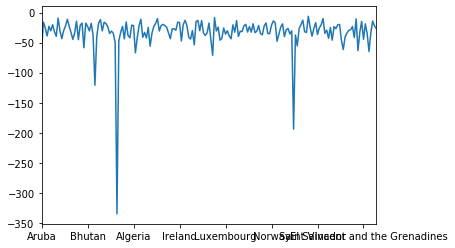

In [27]:
ttest_gii_gni.loc['statistic'].plot()

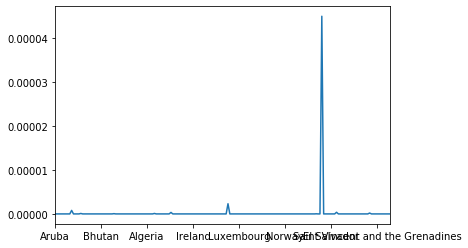

In [28]:
ttest_gii_gni.loc['pvalue'].plot()

In [29]:
ttest_gii_gni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, statistic to pvalue
Columns: 183 entries, Aruba to Zimbabwe
dtypes: object(183)
memory usage: 3.0+ KB


In [30]:
ttest_gii_gni.describe()

,Aruba,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,United States of America,Uzbekistan,Saint Vincent and the Grenadines,Vietnam,Vanuatu,Samoa,Kosovo,Yemen,Zambia,Zimbabwe
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000e+00,2.000000e+00
unique,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000,2.000000,2.000000e+00,2.000000e+00
top,-61.805619,-15.785817,-25.412335,-39.092769,-22.926738,-30.445263,1.260372e-10,5.256370e-13,4.457532e-14,-9.281532,...,3.987882e-13,5.197537e-09,1.071051e-14,2.815463e-10,1.587384e-13,1.193287e-16,-33.235188,-14.179821,3.238469e-11,4.481659e-12
freq,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00


По всем странам pvalue << меньше порогового значения __0.0005__, чититаем, что данные коррелируют и есть взаимосвязь, следовательно, можно приступать к анализу показателей.

### Проверка гипотезы: интегральные показатели коррелируют с (GNI)

In [31]:
dataset['integr_fe']['int_fe_2013'].index

Index(['Political environment', 'Regulatory environment',
       'Business environment', 'Credit', 'Innovation linkages', 'region'],
      dtype='object')

In [32]:
dataset['integr_fe'].keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [33]:
mean_int_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))

In [34]:
i = 0
for ds in dataset['integr_fe'].keys():
    mean_int_fe.iloc[i] = dataset['integr_fe'][ds].drop('region').mean()
    i += 1
mean_int_fe.drop(['Republic of the Congo'], axis = 1, inplace = True)
mean_int_fe

,Aruba,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,United States of America,Uzbekistan,Saint Vincent and the Grenadines,Vietnam,Vanuatu,Samoa,Kosovo,Yemen,Zambia,Zimbabwe
2013,NaN,132,80.6,32.6,107.8,62.2,NaN,17.4,16.2,99,...,12,120.8,NaN,90.8,NaN,NaN,NaN,129.8,93.6,122.4
2014,0,124.6,85.8,32.4,114.4,64.6,0,19.4,18.2,95.6,...,15.6,119,0,94.2,0,0,0,128.2,86.6,114
2015,0,128.4,79.6,29.4,113.4,57.4,0,16.2,20.4,93.6,...,12,107.4,0,90.4,0,0,0,120.6,87.4,123.2
2016,76,0,79,28.2,107.2,64.2,76,17,21.8,81.4,...,13,0,76,87.2,76,76,76,122.8,91.2,0
2017,NaN,NaN,71.2,29.4,107.8,64,NaN,20.2,21.8,76.6,...,12,NaN,NaN,78.4,NaN,NaN,NaN,118.2,92.2,113
2018,NaN,NaN,70,32.6,98.8,72.2,NaN,18.4,23.2,73.2,...,10.6,NaN,NaN,71.4,NaN,NaN,NaN,122,94.8,115.4
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
nulls = mean_int_fe.isnull().sum()
nulls[nulls > 0]

Aruba                   4
Angola                  3
Albania                 1
United Arab Emirates    1
Argentina               1
                       ..
Samoa                   4
Kosovo                  4
Yemen                   1
Zambia                  1
Zimbabwe                1
Length: 181, dtype: int64

In [36]:
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 181 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Central African Republic                        4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia    

In [37]:
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_int_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_int_fe[i] = mean_int_fe[i].fillna(mean_int_fe[i].mean())
mean_int_fe

,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Tanzania,Uganda,Ukraine,Uruguay,United States of America,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
2013,132.00,80.6,32.600000,107.800000,62.2,17.4,16.200000,99.000000,0.00,21.2,...,77.800000,80.800000,92.600000,75.800000,12.000000,120.8,90.8,129.8,93.600000,122.4
2014,124.60,85.8,32.400000,114.400000,64.6,19.4,18.200000,95.600000,108.60,24.4,...,82.800000,72.000000,94.000000,81.600000,15.600000,119.0,94.2,128.2,86.600000,114.0
2015,128.40,79.6,29.400000,113.400000,57.4,16.2,20.400000,93.600000,101.00,28.4,...,79.600000,81.000000,91.600000,77.200000,12.000000,107.4,90.4,120.6,87.400000,123.2
2016,0.00,79.0,28.200000,107.200000,64.2,17.0,21.800000,81.400000,93.20,32.8,...,84.600000,70.800000,86.400000,71.600000,13.000000,0.0,87.2,122.8,91.200000,0.0
2017,96.25,71.2,29.400000,107.800000,64.0,20.2,21.800000,76.600000,88.00,33.4,...,79.600000,73.400000,85.000000,73.400000,12.000000,86.8,78.4,118.2,92.200000,113.0
2018,96.25,70.0,32.600000,98.800000,72.2,18.4,23.200000,73.200000,78.16,30.2,...,71.600000,72.200000,89.400000,69.600000,10.600000,86.8,71.4,122.0,94.800000,115.4
2019,96.25,77.7,30.766667,108.233333,64.1,18.1,20.266667,86.566667,78.16,28.4,...,79.333333,75.033333,89.833333,74.866667,12.533333,86.8,85.4,123.6,90.966667,98.0


In [38]:
ttest_int_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])

In [39]:
errlog_int_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий стран
for col in ttest_int_fe.columns:
    try:
        ttest_int_fe.loc['statistic', col] = stats.ttest_ind(mean_int_fe[col], gni_wb[col]).statistic
        ttest_int_fe.loc['pvalue', col] = stats.ttest_ind(mean_int_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)

ttest_int_fe 

,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Tanzania,Uganda,Ukraine,Uruguay,United States of America,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
statistic,-15.7858,-25.4123,-39.0928,-22.9267,-30.4453,-32.1102,-39.5122,-9.28153,-30.3968,-43.4753,...,-23.2084,-41.715,-10.5516,-63.3008,-32.8658,-14.6231,-18.8304,-14.1798,-22.6557,-26.7961
pvalue,2.16456e-09,8.38131e-12,5.06193e-14,2.81623e-11,9.88637e-13,5.25637e-13,4.45753e-14,7.96575e-07,1.00747e-12,1.4262e-14,...,2.43968e-11,2.33486e-14,1.99881e-07,1.60048e-16,3.98788e-13,5.19754e-09,2.81546e-10,7.37991e-09,3.23847e-11,4.48166e-12


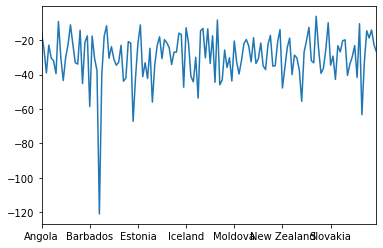

In [40]:
ttest_int_fe.loc['statistic'].plot()

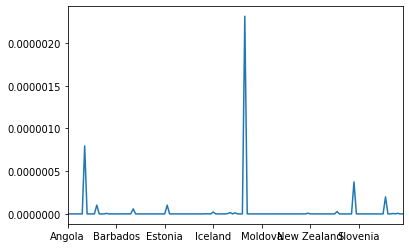

In [41]:
ttest_int_fe.loc['pvalue'].drop('Sudan').plot()

In [42]:
ttest_int_fe_T = ttest_int_fe.T
ttest_int_fe_T.sort_values('pvalue', ascending=True, inplace=True)
ttest_int_fe_T[ttest_int_fe_T['pvalue'] == ttest_int_fe.loc['pvalue'].max()]

,statistic,pvalue
Sudan,-6.21398,4.49096e-05


### Проверка гипотезы: показатели пгосударственной поддержки коррелируют с (GNI)

In [43]:
list(dataset.keys())[:7]

['2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [44]:
mean_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))

In [45]:
i = 0
for ds in list(dataset.keys())[:7]:
    mean_fe.iloc[i] = dataset[ds].mean()
    i += 1
mean_fe.drop(['Republic of the Congo'], axis = 1, inplace = True)
mean_fe

,Aruba,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,United States of America,Uzbekistan,Saint Vincent and the Grenadines,Vietnam,Vanuatu,Samoa,Kosovo,Yemen,Zambia,Zimbabwe
2013,NaN,97.3514,69.8919,32.7297,68.7568,58.2162,NaN,24.8108,24.7027,78.0541,...,21.2973,62.3784,NaN,64.8108,NaN,NaN,NaN,88.6757,69.5676,78.1622
2014,0,94.0286,66.3429,33.4571,72.8857,60.6286,0,23.4571,27.2857,73.2571,...,24.3429,68.9714,0,69.1143,0,0,0,85.8857,65.1143,81.8571
2015,0,91.0312,66.0625,28.4375,75.75,57.375,0,26.0312,23.7812,73.25,...,22.0625,61.9375,0,68.6875,0,0,0,82.6562,64.1875,84.6875
2016,36,0,64.8214,29.25,75.1786,56.1429,36,19.6786,22.9286,67.8929,...,20.1071,0,36,63.3929,36,36,36,68.1429,65.5714,0
2017,NaN,NaN,66.1071,26.1071,75.3214,61.8214,NaN,20.0357,21.5714,64.4643,...,20.1071,NaN,NaN,66.2857,NaN,NaN,NaN,78.4286,68.4286,76.5357
2018,NaN,NaN,63.7037,24.963,69.9259,60.7037,NaN,19.7778,22.4815,63.7778,...,18.8148,NaN,NaN,63.4815,NaN,NaN,NaN,81.7037,75.963,79.3333
2019,NaN,NaN,NaN,NaN,70.1538,NaN,NaN,19.8462,21.5385,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
nulls = mean_fe.isnull().sum()
nulls[nulls > 0]

Aruba                   4
Angola                  3
Albania                 1
United Arab Emirates    1
Armenia                 1
                       ..
Samoa                   4
Kosovo                  4
Yemen                   1
Zambia                  1
Zimbabwe                1
Length: 127, dtype: int64

In [47]:
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 181 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Central African Republic                        4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia    

In [48]:
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_fe[i] = mean_fe[i].fillna(mean_fe[i].mean())
mean_fe

,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Tanzania,Uganda,Ukraine,Uruguay,United States of America,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
2013,97.351351,69.891892,32.729730,68.7568,58.216216,24.8108,24.7027,78.054054,0.000000,24,...,71.243243,76.108108,66.8919,61.189189,21.297297,62.378378,64.810811,88.675676,69.567568,78.162162
2014,94.028571,66.342857,33.457143,72.8857,60.628571,23.4571,27.2857,73.257143,86.828571,28.8571,...,73.800000,71.800000,67.9429,61.428571,24.342857,68.971429,69.114286,85.885714,65.114286,81.857143
2015,91.031250,66.062500,28.437500,75.75,57.375000,26.0312,23.7812,73.250000,82.031250,33.1562,...,75.687500,70.437500,67.3125,60.750000,22.062500,61.937500,68.687500,82.656250,64.187500,84.687500
2016,0.000000,64.821429,29.250000,75.1786,56.142857,19.6786,22.9286,67.892857,79.250000,29.0714,...,82.142857,66.357143,63.6071,56.428571,20.107143,0.000000,63.392857,68.142857,65.571429,0.000000
2017,70.602793,66.107143,26.107143,75.3214,61.821429,20.0357,21.5714,64.464286,78.714286,28.7857,...,76.357143,68.857143,62.9286,59.750000,20.107143,48.321827,66.285714,78.428571,68.428571,76.535714
2018,70.602793,63.703704,24.962963,69.9259,60.703704,19.7778,22.4815,63.777778,65.364821,26.037,...,74.481481,68.074074,65.6296,59.407407,18.814815,48.321827,63.481481,81.703704,75.962963,79.333333
2019,70.602793,66.154921,29.157413,70.1538,59.147963,19.8462,21.5385,70.116020,65.364821,25.3077,...,75.618704,70.272328,65,59.825623,21.121959,48.321827,65.962108,80.915462,68.138719,66.762642


In [49]:
ttest_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])

In [50]:
errlog_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
for col in ttest_fe.columns:
    try:
        ttest_fe.loc['statistic', col] = stats.ttest_ind(mean_fe[col], gni_wb[col]).statistic
        ttest_fe.loc['pvalue', col] = stats.ttest_ind(mean_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)
ttest_fe 

,Angola,Albania,United Arab Emirates,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,Belgium,...,Tanzania,Uganda,Ukraine,Uruguay,United States of America,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
statistic,-15.7858,-25.4123,-39.0928,-22.9267,-30.4453,-32.1102,-39.5122,-9.28153,-30.3968,-43.4753,...,-23.2084,-41.715,-10.5516,-63.3008,-32.8658,-14.6231,-18.8304,-14.1798,-22.6557,-26.7961
pvalue,2.16456e-09,8.38131e-12,5.06193e-14,2.81623e-11,9.88637e-13,5.25637e-13,4.45753e-14,7.96575e-07,1.00747e-12,1.4262e-14,...,2.43968e-11,2.33486e-14,1.99881e-07,1.60048e-16,3.98788e-13,5.19754e-09,2.81546e-10,7.37991e-09,3.23847e-11,4.48166e-12


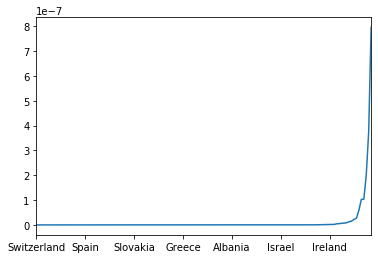

In [51]:
#без выбросов: 1 и 2 МАХ значения
ttest_fe.T.sort_values('pvalue',ascending=True)['pvalue'][:-2].plot()

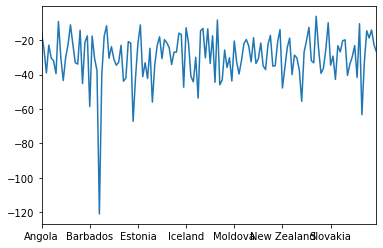

In [52]:
ttest_int_fe .loc['statistic'].plot()

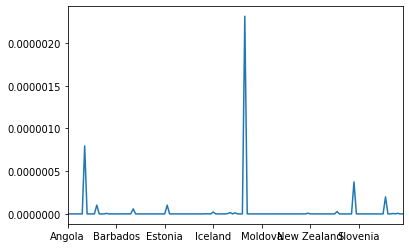

In [53]:
ttest_int_fe.loc['pvalue'].drop('Sudan').plot()

## Заключение 1   
Как видно из последнего графика, для, покрайней мере 140 стран, показатели Global Innovation Index (GII) и Gross Natural Income (GNI) имеют сильную корреляцию. Даже при снижения порога до 0.00005, или 0.000005 зависимость так же остаётся очевидной.  
При очищении показателя GII до показателей иллюстирирующих государственную поддержку, зависимость от GNI не тольоко остаётся, но даже её характер не изменяется. 
Из исследования следует, что меры государственной поддержки инновационной системы напрямую влияют на её ВВП и справедливы для всех стран.

ОН выделяет три группы стран по уровню социально-экономического развития:

• развитые страны (developed countries)  
• страны с переходной экономикой (transition countries)  
• развивающиеся страны (developing countries)

Гипотезы:
1) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNI;  
2) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GII;  
3) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNi + GII;  
4) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 5 интегральным показателям;
5) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 37 показателям;  
6) Существуют показатели (из набора 37) для каждой страны которые им необходимо подтянуть для перехода в следующий класс.

In [202]:
# подготовка датасета GNI и GII
gni_kl = gni_wb.astype('float')
gii_kl = gii.iloc[:7].astype('float')

In [231]:
gii_kl.T

,2013,2014,2015,2016,2017,2018,2019
Albania,93.0,94.0,87.0,92.000000,93.0,83.0,83.0
Algeria,138.0,133.0,126.0,113.000000,108.0,110.0,113.0
American Samoa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Angola,135.0,135.0,120.0,130.000000,130.0,130.0,130.0
...,...,...,...,...,...,...,...
"Virgin Islands, British",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
"Virgin Islands, U.S.",0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Yemen,142.0,141.0,137.0,128.000000,127.0,126.0,129.0
Zambia,118.0,121.0,124.0,125.000000,124.0,120.0,124.0


In [591]:
#scaling GNI и GII
scaler_gni = StandardScaler()
scaler_gii = StandardScaler()
gni_sc = scaler_gni.fit_transform(gni_kl)
gii_sc = scaler_gii.fit_transform(gii_kl)

In [592]:
kmeans_gni = KMeans(n_clusters = 3, n_jobs = -1)
kmeans_gii = KMeans(n_clusters = 3, n_jobs = -1)

In [593]:
gni_kmeans = kmeans_gni.fit(gni_sc.T)
print('GNI labels','(', gni_kmeans.labels_.shape[0], '):', '\n', gni_kmeans.labels_)
print('\n GNI labels count:')
x = gni_kmeans.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
print(np.vstack((ii,y[ii])).T)

GNI labels ( 183 ): 
 [0 1 2 2 1 2 0 1 2 1 0 2 2 2 0 2 2 0 2 1 0 0 1 0 1 0 2 0 1 2 2 0 0 2 0 1 1
 2 2 0 0 0 0 2 2 2 0 0 2 0 1 0 2 2 0 2 0 2 1 1 2 2 0 1 1 0 0 0 0 2 2 2 0 1
 0 0 2 2 0 0 2 0 0 2 1 0 2 0 0 0 0 1 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 1 0 2 0
 0 0 2 2 1 2 0 0 2 2 2 1 0 2 1 0 0 2 2 0 0 2 0 0 0 2 0 2 2 1 2 1 0 2 1 2 0
 0 1 0 2 0 1 2 2 1 0 0 1 0 0 1 2 1 1 1 1 0 0 0 2 2 0 1 0 0 0 0 2 1 1 0]

 GNI labels count:
[[ 0 79]
 [ 1 37]
 [ 2 67]]


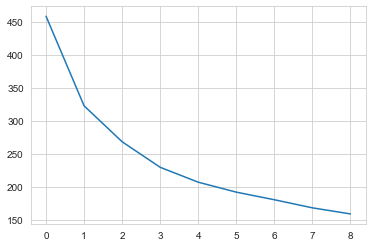

In [596]:
# Поиск оптимального количества классов для GNI

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_jobs = -1)
    kmeans.fit(gni_sc.T)
    
    ssd.append(kmeans.inertia_)
    
#
plt.plot(ssd)

In [631]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

print('GNI')
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(gni_sc.T)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(gni_sc.T, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

GNI
For n_clusters=2, the silhouette score is 0.4248001687591594
For n_clusters=3, the silhouette score is 0.3803335509481306
For n_clusters=4, the silhouette score is 0.3656790573116146
For n_clusters=5, the silhouette score is 0.31490288815019735
For n_clusters=6, the silhouette score is 0.30870547147885496
For n_clusters=7, the silhouette score is 0.27113250438733066
For n_clusters=8, the silhouette score is 0.2777153666389014


Максимальное значение silhouette score при n_clusters = 2, следовательно целесообразно делить страны на 3 класса, а на 2.

In [625]:
gii_kmeans = kmeans_gii.fit(gii_sc.T)
print('GII labels','(', gii_kmeans.labels_.shape[0], '):','\n', gii_kmeans.labels_)
print('\n GII class count:')
x = gii_kmeans.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
print(np.vstack((ii,y[ii])).T)

GII labels ( 227 ): 
 [2 2 1 1 1 1 1 0 1 1 1 1 2 1 1 2 1 1 0 1 2 1 0 0 0 1 0 2 2 1 0 1 2 1 0 1 1
 1 1 1 2 0 1 1 1 0 2 0 1 1 0 1 2 1 1 0 0 2 0 1 1 1 2 1 0 1 2 1 1 1 1 2 2 0
 1 2 1 1 1 0 2 0 1 1 2 0 0 1 2 0 2 1 1 1 0 0 0 2 1 0 2 2 1 1 2 1 0 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 2 1 1 1 2 1 1 2 1 0 2 1 2 1 1 1 1 0 2
 0 1 1 0 1 2 1 1 1 1 1 0 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1
 1 1 1 1 0 2 1 1 0 0 1 1 1 2 2 2 1 1 2 1 1 1 0 2 1 1 1 0 2 0 1 1 0 1 1 0 2
 1 1 2 0 2]

 GII class count:
[[  0  44]
 [  1 133]
 [  2  50]]


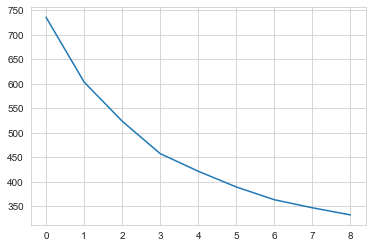

In [626]:
# Поиск оптимального количества классов для GII

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_jobs = -1)
    kmeans.fit(gii_sc.T)
    ssd.append(kmeans.inertia_)
    
# отрисовка графика
plt.plot(ssd)

In [636]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

print('GII')
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(gii_sc.T)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(gii_sc.T, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

GII
For n_clusters=2, the silhouette score is 0.35179740346747895
For n_clusters=3, the silhouette score is 0.3768397290806886
For n_clusters=4, the silhouette score is 0.4016562028983876
For n_clusters=5, the silhouette score is 0.430242612164429
For n_clusters=6, the silhouette score is 0.4453416302126462
For n_clusters=7, the silhouette score is 0.46130519512145207
For n_clusters=8, the silhouette score is 0.47579224329040637
For n_clusters=9, the silhouette score is 0.4803822863752396
For n_clusters=10, the silhouette score is 0.4639723715679451
For n_clusters=11, the silhouette score is 0.47291461513352145
For n_clusters=12, the silhouette score is 0.4778689595725246
For n_clusters=13, the silhouette score is 0.4773703944125951
For n_clusters=14, the silhouette score is 0.4786346035903747


Максимальное значение silhouette score достигается при n_clusters = 9, однако, это может быть локальным максимумом.

---

## Интегральные показатели   
* Political environment  
* Regulatory environment  
* Credit	  
* Innovation linkages

In [340]:
dataset['integr_fe']['int_fe_2013']

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Political environment,76,127,122,59,63,14,9,123,93,136,...,36,23,25,31,131,132,116,141,68,135
Regulatory environment,89,113,135,127,51,14,9,111,29,130,...,35,8,13,60,123,141,115,129,137,142
Business environment,73,113,134,117,49,11,22,63,22,81,...,35,9,15,65,99,142,130,101,69,138
Credit,29,110,135,121,35,12,18,77,64,78,...,53,2,4,113,118,138,28,141,97,124
Innovation linkages,136,135,134,115,113,36,23,121,17,112,...,4,11,3,110,133,69,65,137,97,73
region,Southern Europe,Northern Africa,Middle Africa,South America,Western Asia,Australia and New Zealand,Western Europe,Western Asia,Western Asia,Southern Asia,...,Western Asia,Northern Europe,Northern America,South America,Central Asia,South America,South-Eastern Asia,Western Asia,Eastern Africa,Eastern Africa


In [560]:
intfe_dict_sc ={}
scaler_inffe = StandardScaler()

for ds in dataset['integr_fe'].keys():
    intfe_dict_sc[ds] = scaler_inffe.fit_transform(dataset['integr_fe'][ds]
                                                   .drop('region', axis = 0)
                                                   .astype('float').T)

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [561]:
intfe_dict_sc.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [562]:
kmeans_fe = {}
for key in intfe_dict_sc.keys():
    kmeans_fe[key] = KMeans(n_clusters = 3, n_jobs = -1)

In [563]:
# 3 classes
intfe_dict_kmeans3_labels = {}
intfe_dict_kmeans3_fe = {}

for ds_sc in intfe_dict_sc.keys():
    intfe_dict_kmeans3_labels[ds_sc] = kmeans_fe[ds_sc].fit(intfe_dict_sc[ds_sc])
    intfe_dict_kmeans3_fe[ds_sc] = kmeans_fe[ds_sc].fit_transform(intfe_dict_sc[ds_sc])

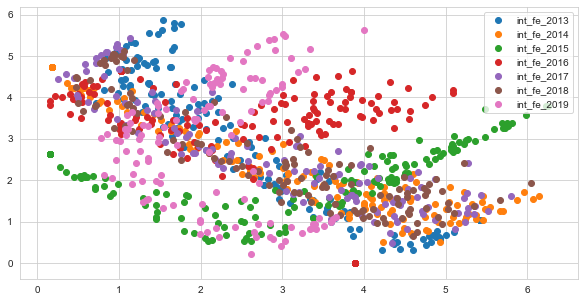

In [570]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in intfe_dict_kmeans3_fe.keys():
    ax.scatter(intfe_dict_kmeans3_fe[i].T[a], intfe_dict_kmeans3_fe[i].T[b], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

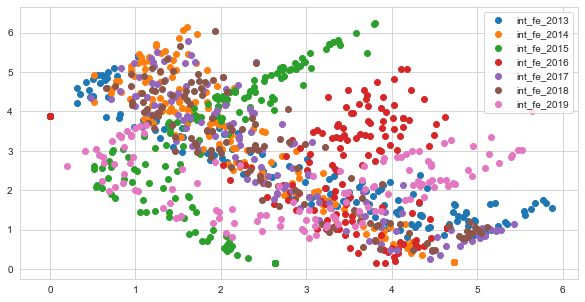

In [573]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in intfe_dict_kmeans3_fe.keys():
    ax.scatter(intfe_dict_kmeans3_fe[i].T[c], intfe_dict_kmeans3_fe[i].T[a], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10)    
plt.show()

Очевидно, в классах есть движение от года к году  

In [612]:
intfe_dict_sc.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

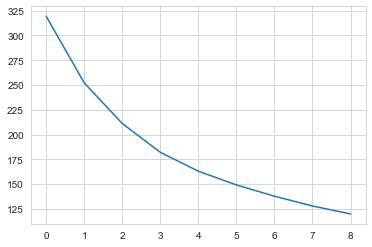

In [617]:
# Поиск оптимального количества классов для GII

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_jobs = -1)
    kmeans.fit(intfe_dict_sc['int_fe_2013'])
    ssd.append(kmeans.inertia_)
    
# отрисовка графика
plt.plot(ssd)

In [639]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 50]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_jobs = -1)
    kmeans.fit(intfe_dict_sc['int_fe_2013'])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(intfe_dict_sc['int_fe_2013'], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46185148954385385
For n_clusters=3, the silhouette score is 0.31740653821716674
For n_clusters=4, the silhouette score is 0.3161688481573834
For n_clusters=5, the silhouette score is 0.2892271156215736
For n_clusters=6, the silhouette score is 0.2973125170407708
For n_clusters=7, the silhouette score is 0.2773925268793847
For n_clusters=8, the silhouette score is 0.2803523726164862
For n_clusters=9, the silhouette score is 0.28407791220114575
For n_clusters=10, the silhouette score is 0.2918736341484178
For n_clusters=50, the silhouette score is 0.25847067198880663


Максимальное занчение silhouette score достигается при n_clusters = 2

#### Графики в 3Д

In [529]:
x = intfe_dict_kmeans3_fe['int_fe_2013'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2013'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2013'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2013'].labels_)
fig.show()

In [501]:
x = intfe_dict_kmeans3_fe['int_fe_2014'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2014'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2014'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2014'].labels_)
fig.show()

In [500]:
x = intfe_dict_kmeans3_fe['int_fe_2015'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2015'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2015'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2015'].labels_)
fig.show()

In [499]:
x = intfe_dict_kmeans3_fe['int_fe_2016'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2016'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2016'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2016'].labels_)
fig.show()

In [497]:
x = intfe_dict_kmeans3_fe['int_fe_2017'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2017'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2017'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2017'].labels_)
fig.show()

In [498]:
x = intfe_dict_kmeans3_fe['int_fe_2018'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2018'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2018'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2018'].labels_)
fig.show()

In [496]:
x = intfe_dict_kmeans3_fe['int_fe_2019'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2019'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2019'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2019'].labels_)
fig.show()

---

### Набор из 37 показателей, характеризующих государственную поддержку инновационной системы страны

In [511]:
list(dataset.keys())[:7]

['2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [530]:
# скалью датасеты 37 показателей
pack37_sc = {}
scaler_pack37 = StandardScaler()

for ds in list(dataset.keys())[:7]:
    pack37_sc[ds] = scaler_pack37.fit_transform(dataset[ds].drop([dataset[ds].columns[0], 
                                                               dataset[ds].columns[1]], axis = 1)
                                             .astype('float').T)

In [533]:
kmeans3_pack37 = {}
for key in pack37.keys():
    kmeans3_pack37[key] = KMeans(n_clusters = 3, n_jobs = -1)

In [574]:
# 3 classes
pack37_kmeans3_labels = {}
pack37_kmeans3_fe = {}

for ds_sc in pack37_sc.keys():
    pack37_kmeans3_labels[ds_sc] = kmeans3_pack37[ds_sc].fit(pack37_sc[ds_sc])
    pack37_kmeans3_fe[ds_sc] =  kmeans3_pack37[ds_sc].fit_transform(pack37_sc[ds_sc])

#Check  
for i in pack37_kmeans3_labels.keys():
    print(i, ':', pack37_kmeans3_labels[i].labels_.shape)  

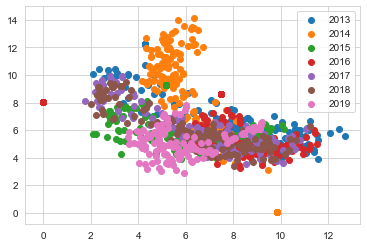

In [552]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in pack37_kmeans3_fe.keys():
    ax.scatter(pack37_kmeans3_fe[i].T[a], pack37_kmeans3_fe[i].T[b], label = i)
    ax.legend()
plt.show()

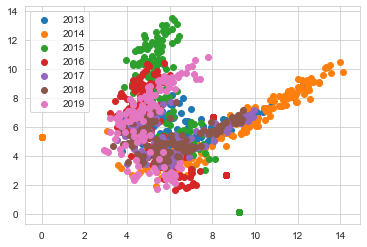

In [550]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in pack37_kmeans3_fe.keys():
    ax.scatter(pack37_kmeans3_fe[i].T[c], pack37_kmeans3_fe[i].T[d], label = i)
    ax.legend()
plt.show()

In [584]:
x = pack37_kmeans3_fe['2013'].T[0]
y = pack37_kmeans3_fe['2013'].T[1]
z = pack37_kmeans3_fe['2013'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels['2013'].labels_, title = '2013')
fig.show()

In [589]:
for i in pack37_kmeans3_fe.keys():
    x = pack37_kmeans3_fe[i].T[0]
    y = pack37_kmeans3_fe[i].T[1]
    z = pack37_kmeans3_fe[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels[i].labels_, title = i)
    fig.show()